In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
%matplotlib inline

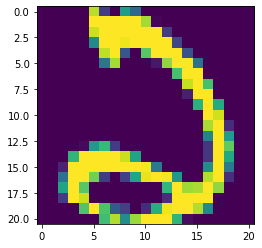

In [2]:
import numpy as np


with open('binXtrain.npy', 'rb') as f:
    newXtrain = np.load(f)


newXtrain.shape
plt.imshow(newXtrain[1987])


In [3]:
newYtrain = np.ndarray(shape=(3964,), dtype=np.uint8)
for i in range(1982):
   newYtrain[i] = 0

for i in range(1982,3964):
   newYtrain[i] = 1

newYtrain.shape


(3964,)

In [34]:
from tensorflow.keras import datasets, layers, models

X_train = newXtrain.reshape(-1,21,21,1)

model = keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(21, 21, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(84, activation='sigmoid')
])

model.summary()



Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 19, 19, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 9, 9, 32)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 7, 7, 128)         36992     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 5, 5, 128)         147584    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 512)             

In [35]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

my_model = model.fit(X_train,newYtrain , epochs=10)
#model.save("infGraph.h5")

Epoch 1/10
124/124 [==============================] - 2s 7ms/step - loss: 0.7779 - accuracy: 0.8194
Epoch 2/10
124/124 [==============================] - 1s 7ms/step - loss: 0.0629 - accuracy: 0.9812
Epoch 3/10
124/124 [==============================] - 1s 7ms/step - loss: 0.0469 - accuracy: 0.9840
Epoch 4/10
124/124 [==============================] - 1s 7ms/step - loss: 0.0307 - accuracy: 0.9902
Epoch 5/10
124/124 [==============================] - 1s 7ms/step - loss: 0.0404 - accuracy: 0.9890
Epoch 6/10
124/124 [==============================] - 1s 6ms/step - loss: 0.0347 - accuracy: 0.9901
Epoch 7/10
124/124 [==============================] - 1s 7ms/step - loss: 0.0337 - accuracy: 0.9919
Epoch 8/10
124/124 [==============================] - 1s 7ms/step - loss: 0.0193 - accuracy: 0.9927
Epoch 9/10
124/124 [==============================] - 1s 7ms/step - loss: 0.0289 - accuracy: 0.9922
Epoch 10/10
124/124 [==============================] - 1s 7ms/step - loss: 0.0176 - accuracy: 0.9930

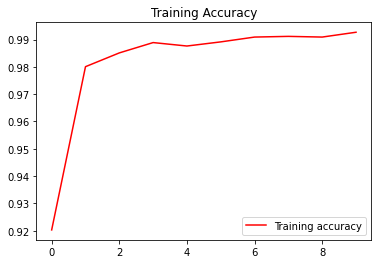

<Figure size 432x288 with 0 Axes>

In [36]:

acc = my_model.history['accuracy']
loss = my_model.history['loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

16/16 [==============================] - 0s 9ms/step - loss: 0.0196 - accuracy: 0.9940


[0.01963275857269764, 0.9939516186714172]

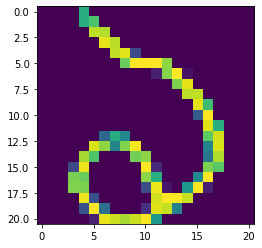

In [37]:
with open('binXtest.npy', 'rb') as f:
    newXtest = np.load(f)

newYtest = np.ndarray(shape=(496,), dtype=np.uint8)
for i in range(167):
   newYtest[i] = 0

for i in range(167,496):
   newYtest[i] = 1
X_test = newXtest.reshape(-1,21,21,1)

plt.imshow(X_test[167])
model.evaluate(X_test, newYtest)

In [38]:
predictions = model.predict(X_test)

predictions.shape

(496, 84)

In [39]:
y_predicted_labels = [np.argmax(i) for i in predictions]
cm = tf.math.confusion_matrix(labels=newYtest,predictions=y_predicted_labels)

Text(42.0, 0.5, 'Real')

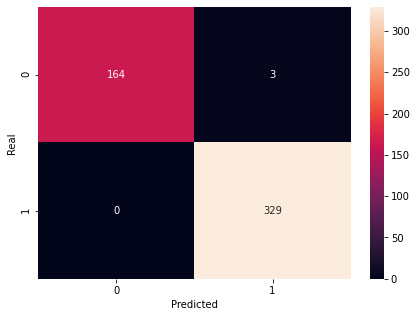

In [40]:
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Real')